In [89]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pygam import LinearGAM
from pygam.utils import generate_X_grid

In [140]:
df_all = pd.read_csv('fanfic_regression_data_curated.tsv', sep = '\t')

### GAM

In [168]:
df_all = df_all.sort_values(by = 'Kudos')[20:-20]
df_all = df_all.sort_values(by = 'Hits')[20:-20]
df_all = df_all.sort_values(by = 'Comments')[20:-20]
df_all = df_all.sort_values(by = 'Bookmarks')[20:-20]
df_all = df_all.sort_values(by = 'Term_novelty')[20:-20]
df_all = df_all.sort_values(by = 'Topic_novelty')[20:-20]

In [169]:
# df_all = df_all.sample(1000)

In [170]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Relationship', 'Term_novelty', 'Topic_novelty',
       'tag_novelty', 'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_none',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_blood', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'Freq_author', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_

In [171]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.dropna(how = 'any')

In [172]:
X = df_all[['ChapterIndex', 'Chapters','Term_novelty', 'Topic_novelty',
        'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
        'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_blood',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'Freq_author',  'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Freq_relationship',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_homestuck', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
       'History']]

In [173]:
# kwargs = {'lam': np.linspace(300,305,5), 'n_splines': np.linspace(0,50,5)}
# gam = LinearGAM()
# gam.gridsearch(X, y,**kwargs)
# gam.summary()

In [186]:
gam_kudos = LinearGAM(n_splines=20, lam=10).fit(X, df_all['Kudos'])

In [187]:
gam_hits = LinearGAM(n_splines=20, lam=10).fit(X, df_all['Hits'])

In [188]:
gam_comments = LinearGAM(n_splines=20, lam=10).fit(X, df_all['Comments'])

In [189]:
gam_bookmarks = LinearGAM(n_splines=20, lam=10).fit(X, df_all['Bookmarks'])

In [190]:
gam_hits.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    109.4422
Link Function:                     IdentityLink Log Likelihood:                              -7767707.3614
Number of Samples:                       526590 AIC:                                         15535635.6073
                                                AICc:                                        15535635.6541
                                                GCV:                                          1017026.6436
                                                Scale:                                        1016646.1835
                                                Pseudo R-Squared:                                    0.183
Feature Function   Data Type      Num

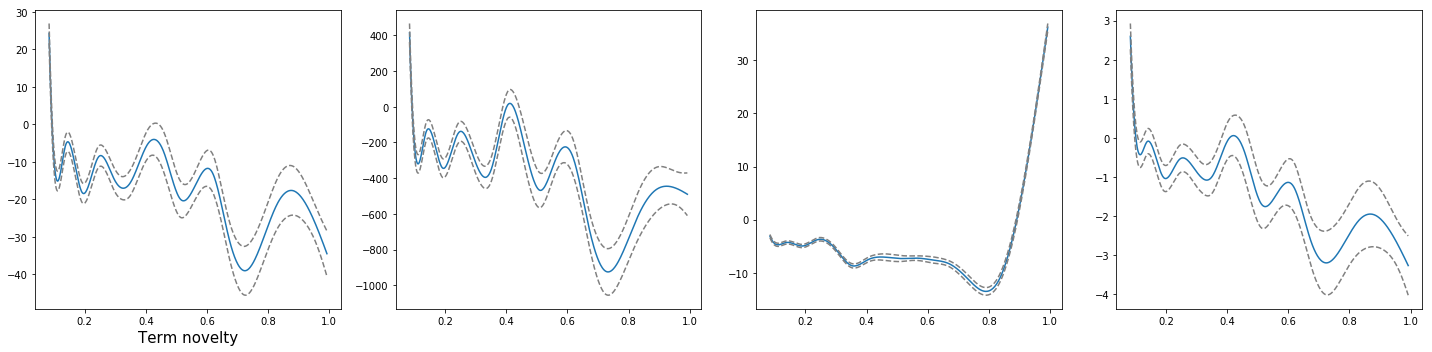

In [191]:
titles = ['ChapterIndex', 'Chapters','Term_novelty', 'Topic_novelty',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_None',
       'ArchiveWarnings_none', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_blood',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'Freq_author', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Freq_relationship', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_homestuck', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
       'History']

plt.figure(figsize = (20, 5))
plt.subplot(1,4,1)

X1 = generate_X_grid(gam_kudos)
pdep, confi = gam_kudos.partial_dependence(X1, feature=2, width=.95)
plt.plot(X1[:, 2], pdep)
plt.plot(X1[:, 2], confi[0][:, 0], c='grey', ls='--')
plt.plot(X1[:, 2], confi[0][:, 1], c='grey', ls='--')
plt.xlabel(titles[2].replace('_', ' '), fontsize=15)

plt.subplot(1,4,2)

X2 = generate_X_grid(gam_hits)
pdep, confi = gam_hits.partial_dependence(X2, feature=2, width=.95)
plt.plot(X2[:, 2], pdep)
plt.plot(X2[:, 2], confi[0][:, 0], c='grey', ls='--')
plt.plot(X2[:, 2], confi[0][:, 1], c='grey', ls='--')

plt.subplot(1,4,3)

X3 = generate_X_grid(gam_comments)
pdep, confi = gam_comments.partial_dependence(X3, feature=2, width=.95)
plt.plot(X3[:, 2], pdep)
plt.plot(X3[:, 2], confi[0][:, 0], c='grey', ls='--')
plt.plot(X3[:, 2], confi[0][:, 1], c='grey', ls='--')

plt.subplot(1,4,4)

X4 = generate_X_grid(gam_bookmarks)
pdep, confi = gam_bookmarks.partial_dependence(X4, feature=2, width=.95)
plt.plot(X4[:, 2], pdep)
plt.plot(X4[:, 2], confi[0][:, 0], c='grey', ls='--')
plt.plot(X4[:, 2], confi[0][:, 1], c='grey', ls='--')
    
    
    
plt.tight_layout()
plt.savefig('gam_teresults.pdf', type = 'pdf')